<a href="https://colab.research.google.com/github/5237-mests/Amharic-E-commerce-Data-Extractor/blob/task-3/notebooks/finetuning_colabnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RAG

In [ ]:
import duckdb

# Paths
INPUT_CSV = '../data/raw/complaints.csv/complaints.csv'
OUTPUT_PARQUET = '../data/filtered_complaints.parquet'

# Define your filtering SQL
query = f"""
SELECT *
FROM read_csv_auto('{INPUT_CSV}')
WHERE "Product" IN (
    'Credit card',
    'Payday loan, title loan, or personal loan',
    'Checking or savings account',
    'Buy Now, Pay Later',
    'Money transfers'
) AND "Consumer complaint narrative" IS NOT NULL
"""

# Run the query and save as Parquet
print("🔍 Filtering large CSV...")
filtered_df = duckdb.query(query).to_df()

print("💾 Saving filtered data as Parquet...")
filtered_df.to_parquet(OUTPUT_PARQUET, index=False)

print(f"✅ Done! Saved to: {OUTPUT_PARQUET}")


🔍 Filtering large CSV...
💾 Saving filtered data as Parquet...
✅ Done! Saved to: ../data/filtered_complaints.parquet


In [ ]:
print(f"Total rows in filtered data: {len(filtered_df)}")
print(f"Unique products in filtered data: ", filtered_df["Product"].unique())

Total rows in filtered data: 82164
Unique products in filtered data:  ['Credit card' 'Money transfers']


In [11]:
print(f"Total rows in filtered data: {len(filtered_df)}")
print(f"Unique products in filtered data: ", filtered_df["Product"].unique())

Total rows in filtered data: 239721
Unique products in filtered data:  ['Checking or savings account' 'Credit card'
 'Payday loan, title loan, or personal loan' 'Money transfers']


### EDA

In [12]:
import pandas as pd
#  Load Filtered Parquet Data
df = pd.read_parquet('../data/filtered_complaints.parquet')

In [13]:
print(df["Product"].unique())

['Checking or savings account' 'Credit card'
 'Payday loan, title loan, or personal loan' 'Money transfers']


In [14]:
print("📊 Data Overview:")
print(f"Total rows: {len(df)}")

📊 Data Overview:
Total rows: 239721


In [15]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-09-21,Checking or savings account,Checking account,Managing an account,Fee problem,Bank of America has charged me a {$12.00} mont...,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,95610,None,Consent provided,Web,2023-09-21,Closed with monetary relief,True,N/A,7585703
1,2025-02-26,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,I was scammed online by a company named XXXX. ...,None,CAPITAL ONE FINANCIAL CORPORATION,HI,96789,Servicemember,Consent provided,Web,2025-02-26,Closed with monetary relief,True,N/A,12202313
2,2023-09-09,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,My TD credit card had 3 unauthorized transacti...,None,TD BANK US HOLDING COMPANY,NY,100XX,None,Consent provided,Web,2023-09-09,Closed with non-monetary relief,True,N/A,7523444
3,2023-09-21,Checking or savings account,Checking account,Problem caused by your funds being low,Late or other fees,I'll never understand why people in America 's...,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,90044,None,Consent provided,Web,2023-09-21,Closed with explanation,True,N/A,7582968
4,2023-09-21,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,I have a small business checking account for m...,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",IL,60543,Older American,Consent provided,Web,2023-09-21,Closed with explanation,False,N/A,7577502


In [ ]:
# Complaints Distribution by Product
# 📌 1. Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For clean visuals
sns.set(style='whitegrid')

product_counts = df['Product'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=product_counts.values, y=product_counts.index, palette='Blues_d')
plt.title('Number of Complaints by Financial Product', fontsize=16)
plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.show()



Narrative Lengths

count    239721.000000
mean        212.423680
std         234.372846
min           1.000000
25%          77.000000
50%         149.000000
75%         268.000000
max        6469.000000
Name: Narrative_Length, dtype: float64


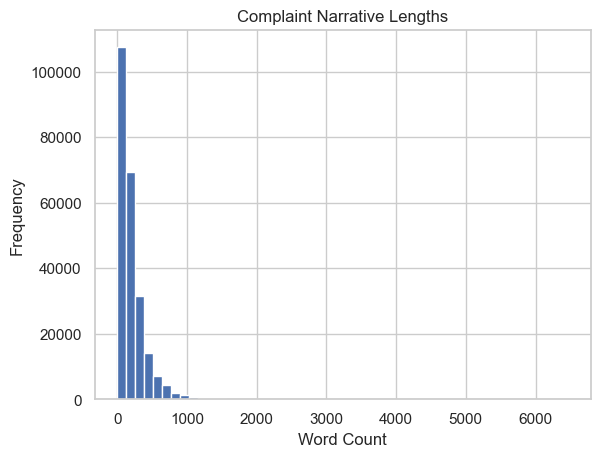

In [17]:
# Add length column
df['Narrative_Length'] = df['Consumer complaint narrative'].astype(str).apply(lambda x: len(x.split()))

# Describe narrative lengths
print(df['Narrative_Length'].describe())

# Histogram
df['Narrative_Length'].plot(kind='hist', bins=50, title='Complaint Narrative Lengths')
plt.xlabel('Word Count')
plt.show()


In [32]:
# how many of narratives are more than 1000 words
long_narratives = df[df['Narrative_Length'] > 1000]
print(f"Number of narratives longer than 1000 words: {len(long_narratives)}")

Number of narratives longer than 1000 words: 2044


drop outliers: cosidering their narratives are too long

```python
df = df[df['Narrative_Length'] < 1500]
```

In [29]:
df = df[df['Narrative_Length'] <= 1500]

count    238766.000000
mean        204.543901
std         192.702033
min           1.000000
25%          77.000000
50%         148.000000
75%         266.000000
max        1500.000000
Name: Narrative_Length, dtype: float64


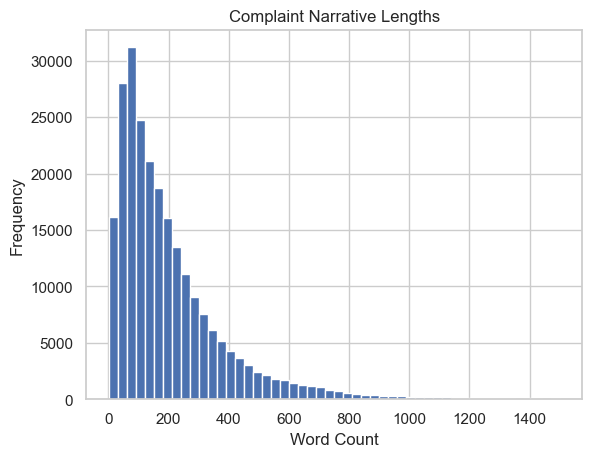

In [33]:
# Describe narrative lengths
print(df['Narrative_Length'].describe())

# Histogram
df['Narrative_Length'].plot(kind='hist', bins=50, title='Complaint Narrative Lengths')
plt.xlabel('Word Count')
plt.show()

mISSING nARRATIVES

In [34]:
# Complaints with/without narratives
with_narrative = df['Consumer complaint narrative'].notnull().sum()
without_narrative = df['Consumer complaint narrative'].isnull().sum()

print(f"With narrative: {with_narrative}")
print(f"Without narrative: {without_narrative}")


With narrative: 238766
Without narrative: 0


Filter & Clean

In [35]:
# Basic cleaning function
def clean_text(text):
    import re
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['Cleaned_Narrative'] = df['Consumer complaint narrative'].apply(clean_text)

# Save cleaned dataset
filtered_df.to_csv('../data/processed/filtered_complaints.csv', index=False)


In [36]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Narrative_Length,Cleaned_Narrative
0,2023-09-21,Checking or savings account,Checking account,Managing an account,Fee problem,Bank of America has charged me a {$12.00} mont...,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,95610,None,Consent provided,Web,2023-09-21,Closed with monetary relief,True,N/A,7585703,147,bank of america has charged me a 1200 monthly ...
1,2025-02-26,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,I was scammed online by a company named XXXX. ...,None,CAPITAL ONE FINANCIAL CORPORATION,HI,96789,Servicemember,Consent provided,Web,2025-02-26,Closed with monetary relief,True,N/A,12202313,136,i was scammed online by a company named xxxx i...
2,2023-09-09,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,My TD credit card had 3 unauthorized transacti...,None,TD BANK US HOLDING COMPANY,NY,100XX,None,Consent provided,Web,2023-09-09,Closed with non-monetary relief,True,N/A,7523444,66,my td credit card had 3 unauthorized transacti...
3,2023-09-21,Checking or savings account,Checking account,Problem caused by your funds being low,Late or other fees,I'll never understand why people in America 's...,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,90044,None,Consent provided,Web,2023-09-21,Closed with explanation,True,N/A,7582968,166,ill never understand why people in america s c...
4,2023-09-21,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,I have a small business checking account for m...,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",IL,60543,Older American,Consent provided,Web,2023-09-21,Closed with explanation,False,N/A,7577502,428,i have a small business checking account for m...


Summary:
- The given dataset is a large CSV file containing complaints about financial products.
- No products for Buy Now, Pay Later (BNPL)
- The product distribution is as follows:
    - Checking or savings account (140000+)
    - Credit card (80000+)
    - Money transfers (< 1000)
- The narrative column contains text data, which may be useful for further analysis.
- There is outliers in the length of narratives
- Cleaned dataset saved to '../data/processed/filtered_complaints.csv'